In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [69]:
red = '#E33131'
blue = '#3772FF'
gray = '#C0C5C1'
darkgray = '#858786'
yellow = '#F5D491'
orange = '#E89005'
black = '#080708'
white = '#FEFFFE'
green = '#4CB944'

# Data Overview

In [145]:
df = pd.read_csv('flight.csv')
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,210,505308,239560.0,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,140,362480,171483.0,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,135,351159,163618.0,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,23,337314,116350.0,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,152,273844,124560.0,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [71]:
df.shape

(62988, 23)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [73]:
df.duplicated().sum()

0

In [74]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

# Data Error Handling

In [146]:
df['FFP_DATE'] = pd.to_datetime(df['FFP_DATE'])
df['FIRST_FLIGHT_DATE'] = pd.to_datetime(df['FIRST_FLIGHT_DATE'])
df['LOAD_TIME'] = pd.to_datetime(df['LOAD_TIME'])
df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'], errors='coerce')

In [147]:
df.drop(columns=['WORK_CITY','WORK_PROVINCE'], inplace=True)

In [148]:
df.dropna(inplace=True)

In [123]:
len(df['WORK_COUNTRY'].unique())

117

In [149]:
df.drop(columns=['WORK_COUNTRY'], inplace=True)

In [150]:
df['FFP_TIER'].unique()

array([6, 5, 4], dtype=int64)

In [151]:
df['FFP_TIER'] = df['FFP_TIER'].astype('object')

In [152]:
df.drop(columns=['LOAD_TIME'], inplace=True)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61437 entries, 0 to 62986
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          61437 non-null  int64         
 1   FFP_DATE           61437 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  61437 non-null  datetime64[ns]
 3   GENDER             61437 non-null  object        
 4   FFP_TIER           61437 non-null  object        
 5   AGE                61437 non-null  float64       
 6   FLIGHT_COUNT       61437 non-null  int64         
 7   BP_SUM             61437 non-null  int64         
 8   SUM_YR_1           61437 non-null  float64       
 9   SUM_YR_2           61437 non-null  float64       
 10  SEG_KM_SUM         61437 non-null  int64         
 11  LAST_FLIGHT_DATE   61437 non-null  datetime64[ns]
 12  LAST_TO_END        61437 non-null  int64         
 13  AVG_INTERVAL       61437 non-null  float64       
 14  MAX_IN

In [84]:
100 * (1 - (61437 / 62988))

2.462373785482952

# EDA

In [85]:
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,2006-11-02,2008-12-24,Male,6,31.0,210,505308,239560.0,234188.0,580717,2014-03-31,1,3.483254,18,34,0.961639,619760,50
1,28065,2007-02-19,2007-08-03,Male,6,42.0,140,362480,171483.0,167434.0,293678,2014-03-25,7,5.194245,17,29,1.252314,415768,33
2,55106,2007-02-01,2007-08-30,Male,6,40.0,135,351159,163618.0,164982.0,283712,2014-03-21,11,5.298507,18,20,1.254676,406361,26
3,21189,2008-08-22,2008-08-23,Male,5,64.0,23,337314,116350.0,125500.0,281336,2013-12-26,97,27.863636,73,11,1.090870,372204,12
4,39546,2009-04-10,2009-04-15,Male,6,48.0,152,273844,124560.0,130702.0,309928,2014-03-27,5,4.788079,47,27,0.970658,338813,39


In [153]:
columns = [col.lower() for col in df.columns]
df.columns = columns

In [154]:
intervals = [col for col in df.columns if df[col].dtype.name in ['datetime64[ns]']]
print(intervals)

['ffp_date', 'first_flight_date', 'last_flight_date']


In [90]:
# df['ffp_to_first_flight'] = df['first_flight_date'] - df['ffp_date']
# df['last_flight_to_first_flight'] = df['last_flight_date'] - df['first_flight_date']

In [155]:
nums = [col for col in df.columns if df[col].dtype.name not in ['object','datetime64[ns]']]
print(nums)

['member_no', 'age', 'flight_count', 'bp_sum', 'sum_yr_1', 'sum_yr_2', 'seg_km_sum', 'last_to_end', 'avg_interval', 'max_interval', 'exchange_count', 'avg_discount', 'points_sum', 'point_notflight']


In [156]:
cats = [col for col in df.columns if df[col].dtype.name in ['object']]
print(cats)

['gender', 'ffp_tier']


In [93]:
df[nums].describe()

,member_no,age,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
count,61437.000000,61437.000000,61437.000000,61437.000000,61437.000000,61437.000000,61437.000000,61437.000000,61437.000000,61437.000000,61437.000000,61437.000000,61437.000000,61437.000000
mean,31486.068346,42.496281,11.939776,11023.455312,5371.931577,5647.021518,17276.042710,173.565880,68.182230,167.320198,0.323730,0.721644,12660.916500,2.757947
std,18185.683471,9.888107,14.118982,16407.296822,8131.393893,8707.188825,21054.585569,181.477696,77.774203,123.150092,1.145186,0.184845,20614.743676,7.403055
min,2.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15724.000000,35.000000,3.000000,2584.000000,1020.000000,820.000000,4849.000000,28.000000,23.714286,81.000000,0.000000,0.612500,2838.000000,0.000000
50%,31473.000000,41.000000,7.000000,5780.000000,2811.000000,2808.000000,10149.000000,107.000000,45.000000,144.000000,0.000000,0.711781,6420.000000,0.000000
75%,47249.000000,48.000000,15.000000,12942.000000,6590.000000,6890.000000,21431.000000,262.000000,82.500000,229.000000,0.000000,0.808987,14425.000000,1.000000
max,62988.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.000000,140.000000


In [94]:
df[intervals].describe(datetime_is_numeric=True)

,ffp_date,first_flight_date,last_flight_date
count,61437,61437,61437
mean,2010-03-09 04:50:21.475657984,2010-09-02 18:20:54.787831296,2013-10-10 04:01:51.802334208
min,2004-11-01 00:00:00,1905-12-31 00:00:00,2012-04-01 00:00:00
25%,2008-04-14 00:00:00,2008-12-17 00:00:00,2013-07-14 00:00:00
50%,2010-10-12 00:00:00,2011-04-24 00:00:00,2013-12-16 00:00:00
75%,2012-03-29 00:00:00,2012-07-26 00:00:00,2014-03-04 00:00:00
max,2013-03-31 00:00:00,2015-05-30 00:00:00,2014-03-31 00:00:00


In [95]:
df['first_flight_date'].sort_values(ascending=True).head()

4455    1905-12-31
30099   1905-12-31
46953   2004-11-03
494     2004-11-04
1511    2004-11-05
Name: first_flight_date, dtype: datetime64[ns]

Insight:
- Terdapat data first_flight_date yang invalid --> untuk customer yang tidak pernah melakukan first flight diisi dengan tanggal default yaitu '1905-12-31'

In [157]:
df = df[df['first_flight_date'] > '1905-12-31']

In [97]:
# df = df[df['ffp_to_first_flight']>='0 days']

In [98]:
# df = df[df['last_flight_to_first_flight']>='0 days']

In [99]:
df.shape

(61435, 19)

In [100]:
df[cats].describe()

,gender,ffp_tier
count,61435,61435
unique,2,3
top,Male,4
freq,46971,56586


In [101]:
for col in cats:
    print(col)
    print(df[col].value_counts(),'\n')

gender
Male      46971
Female    14464
Name: gender, dtype: int64 

ffp_tier
4    56586
5     3354
6     1495
Name: ffp_tier, dtype: int64 



member_no


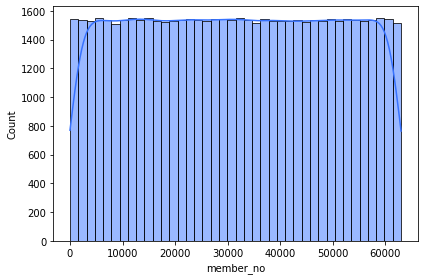

age


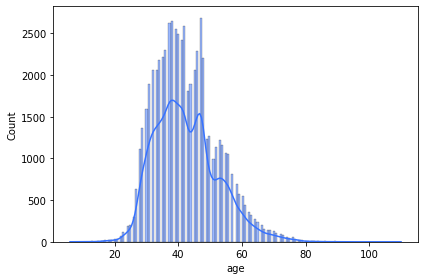

flight_count


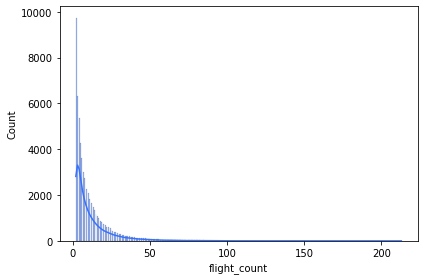

bp_sum


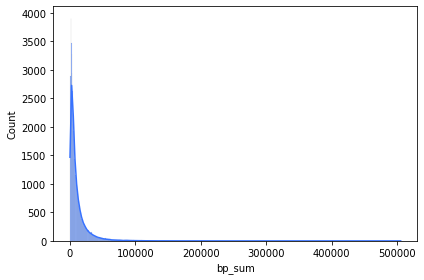

sum_yr_1


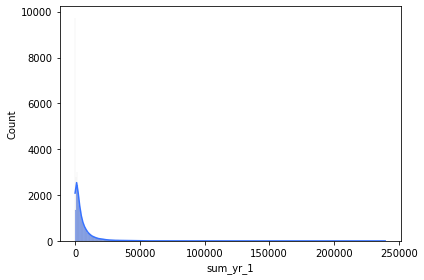

sum_yr_2


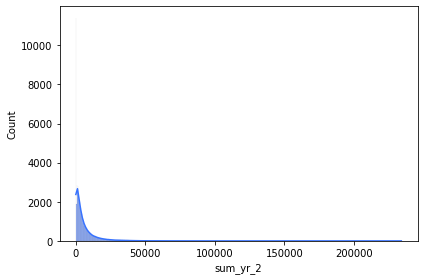

seg_km_sum


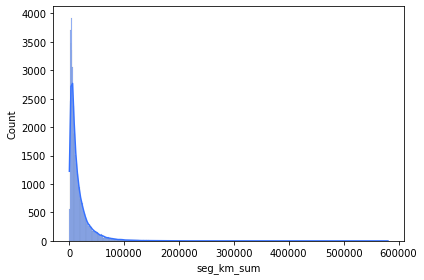

last_to_end


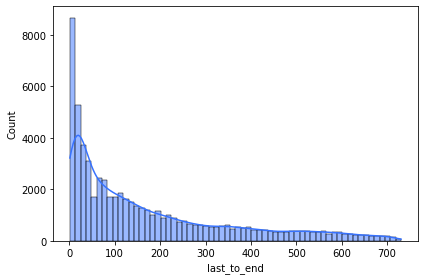

avg_interval


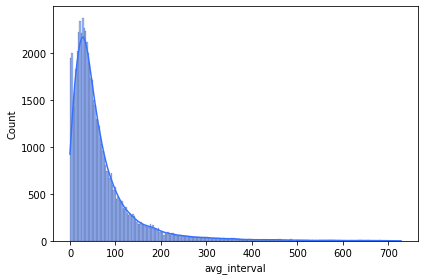

max_interval


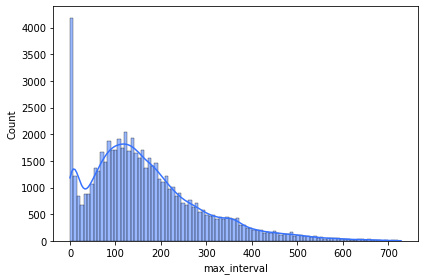

exchange_count


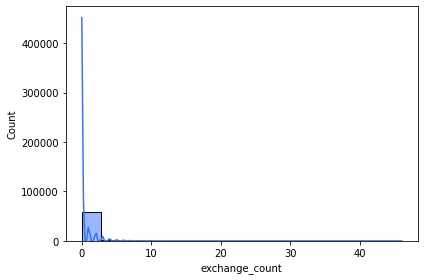

avg_discount


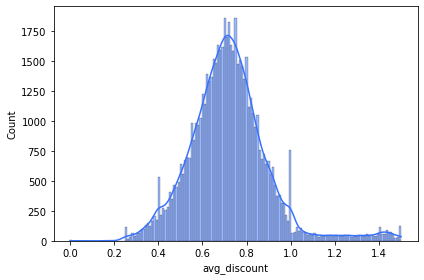

points_sum


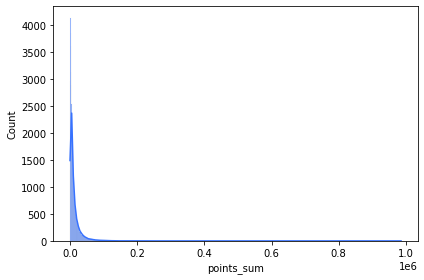

point_notflight


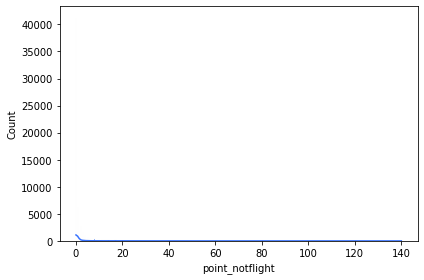

In [102]:
for col in nums:
    print(col)
    sns.histplot(data=df, x=col, color=blue, kde=True)
    plt.tight_layout()
    plt.show()

In [103]:
df[df['max_interval']==0].shape

(395, 19)

In [104]:
df[(df['max_interval']==0)&(df['exchange_count']<2)].shape

(395, 19)

In [105]:
df[df['max_interval']>0].head()

,member_no,ffp_date,first_flight_date,gender,ffp_tier,age,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
0,54993,2006-11-02,2008-12-24,Male,6,31.0,210,505308,239560.0,234188.0,580717,2014-03-31,1,3.483254,18,34,0.961639,619760,50
1,28065,2007-02-19,2007-08-03,Male,6,42.0,140,362480,171483.0,167434.0,293678,2014-03-25,7,5.194245,17,29,1.252314,415768,33
2,55106,2007-02-01,2007-08-30,Male,6,40.0,135,351159,163618.0,164982.0,283712,2014-03-21,11,5.298507,18,20,1.254676,406361,26
3,21189,2008-08-22,2008-08-23,Male,5,64.0,23,337314,116350.0,125500.0,281336,2013-12-26,97,27.863636,73,11,1.090870,372204,12
4,39546,2009-04-10,2009-04-15,Male,6,48.0,152,273844,124560.0,130702.0,309928,2014-03-27,5,4.788079,47,27,0.970658,338813,39


Insight:
- Max interval dan avg interval sama dengan 0 karena customer belom exchange point lebih dari satu kali, sehingga tidak terhitung jarak antara exchange pertama dan kedua.

gender


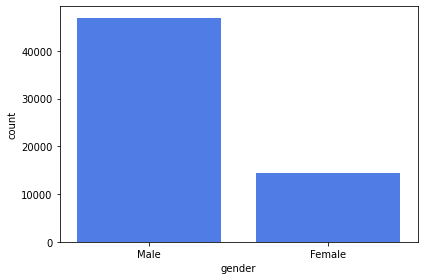

ffp_tier


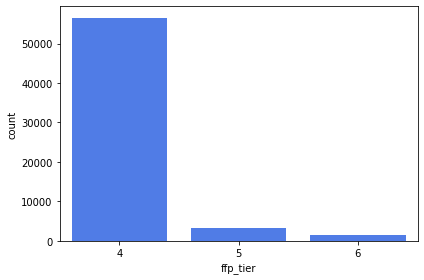

In [106]:
for col in cats:
    print(col)
    sns.countplot(data=df, x=col, color=blue)
    plt.tight_layout()
    plt.show()

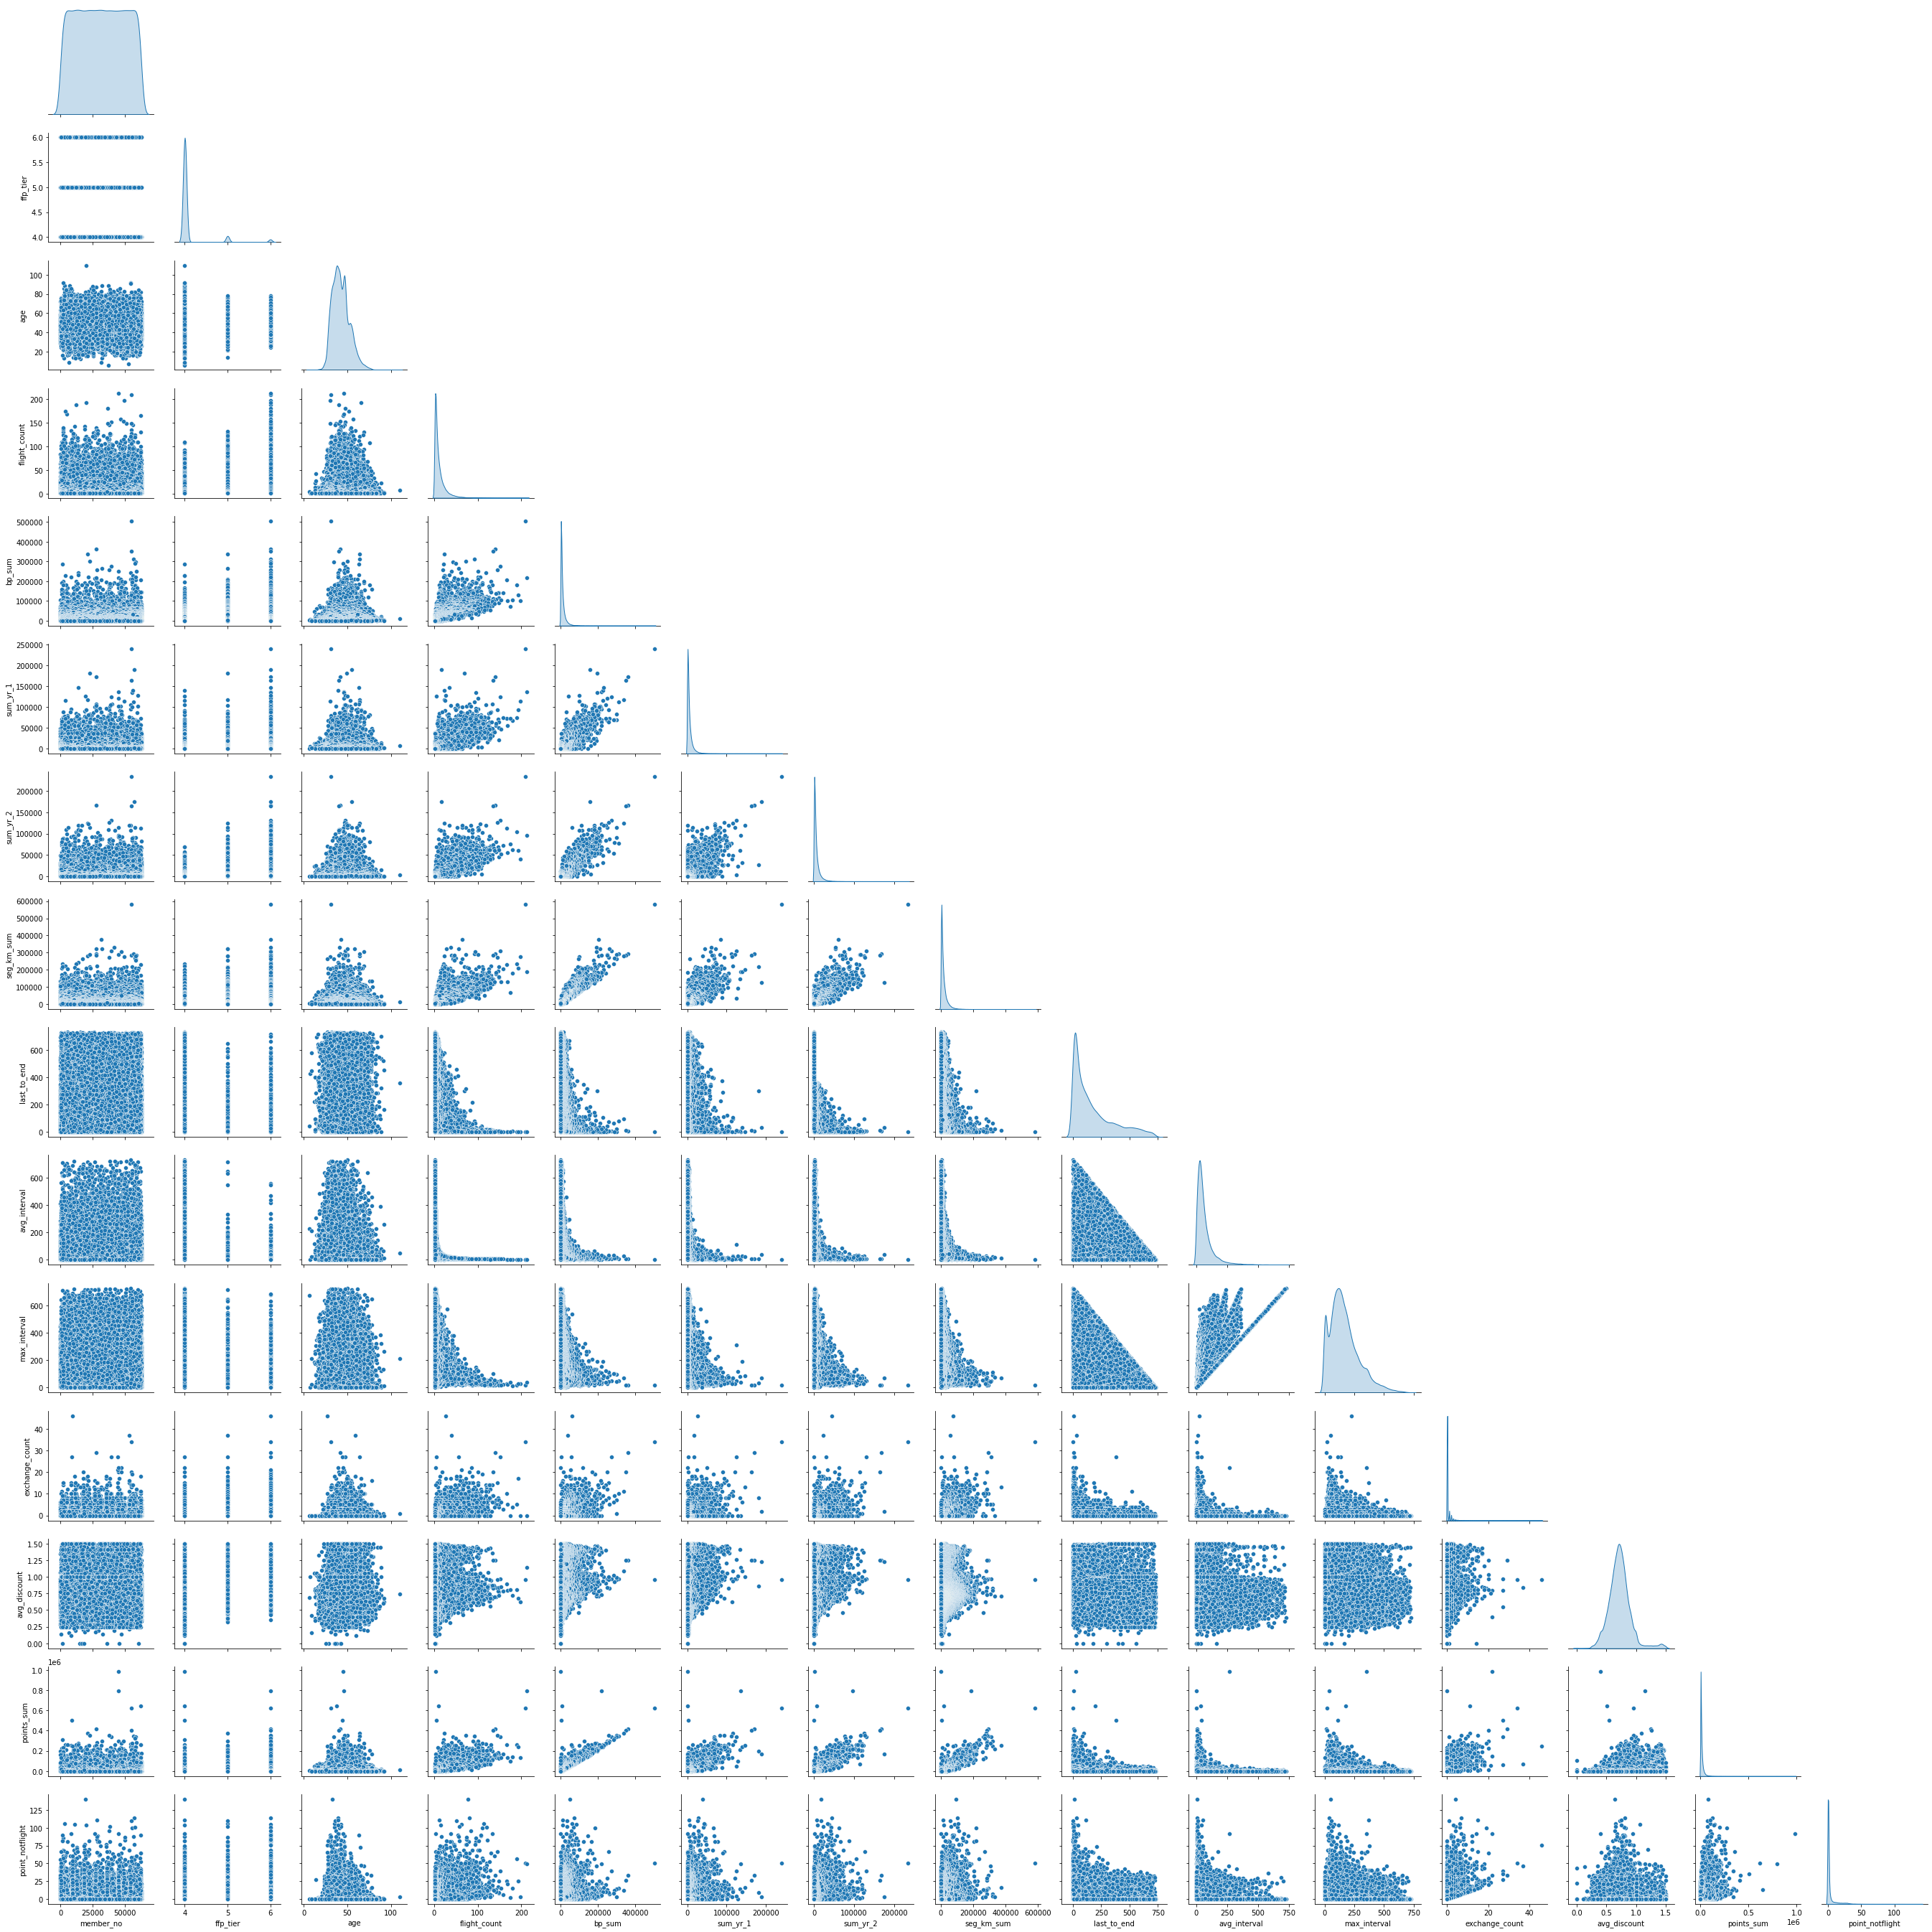

In [107]:
sns.pairplot(data=df, diag_kind='kde', palette=[gray], corner=True)
plt.tight_layout()
plt.show()

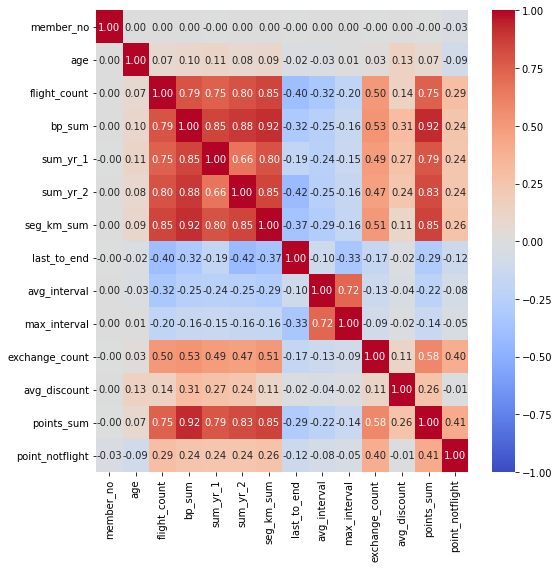

In [108]:
corr = df[nums].corr(method='pearson')
plt.figure(figsize=(8,8))
sns.heatmap(corr, vmin=-1, vmax=1, cmap='coolwarm', annot=True, fmt='.2f')
plt.tight_layout()
plt.show()

Insight:
- flight_count, bp_sum, sum_yr_1, sum_yr_2, seg_km_sum, dan points_sum saling memiliki korelasi positif yang kuat (>0.7)
- avg_interval dan max_interval memiliki korelasi positif yang kuat (>0.7)
- exchange_count memiliki korelasi positif yang cukup kuat (~0.5) dengan flight_count, bp_sum, sum_yr_1, sum_yr_2, seg_km_sum, points_sum, dan point_notflight
- point_notflight memiliki korelasi positif yang kurang kuat (0.2 - 0.4) dengan flight_count, bp_sum, sum_yr_1, sum_yr_2, seg_km_sum, exchange_count, dan points_sum
- last_to_end memiliki korelasi negatif yang kurang kuat (0.2 - 0.4) dengan flight_count, bp_sum, sum_yr_1, sum_yr_2, seg_km_sum, exchange_count, dan points_sum
- avg_interval memiliki korelasi negatif yang kurang kuat (0.2 - 0.3) dengan flight_count, bp_sum, sum_yr_1, sum_yr_2, seg_km_sum, exchange_count, dan points_sum

# Feature Selection & Data Preprocessing

In [158]:
feat = ['flight_count','sum_yr_1','seg_km_sum',]

Alasan:
- flight_count : menentukan segmentasi customer berdasarkan jumlah penerbangan dari customer
- sum_yr_1 : segmentasi customer berdasarkan total pembayaran tiket
- seg_km_sum : segmentasi customer berdasarkan total jarak penerbangan dari customer
- exchange_count : segmentasi customer berdasarkan jumlah penukaran poin
- points_sum : segmentasi customer berdasarkan jumlah poin yang sudah dikumpulkan oleh customer

In [164]:
data = df[feat].copy()

In [165]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)

StandardScaler()

In [166]:
scaled = scaler.transform(data)

In [168]:
data[feat] = scaled
data.head()

,flight_count,sum_yr_1,seg_km_sum
0,14.028313,28.800251,26.761413
1,9.070326,20.428199,13.128107
2,8.716184,19.460968,12.654758
3,0.783406,13.647990,12.541907
4,9.920267,14.657648,13.899923


# K-Means Clustering

[85858.89167697808, 56733.298533287125, 44063.75947502558, 37455.847333263555, 33432.67782190673, 30865.01787349738, 28503.636044609422, 26581.23784281178, 24980.588180346254]


<AxesSubplot:>

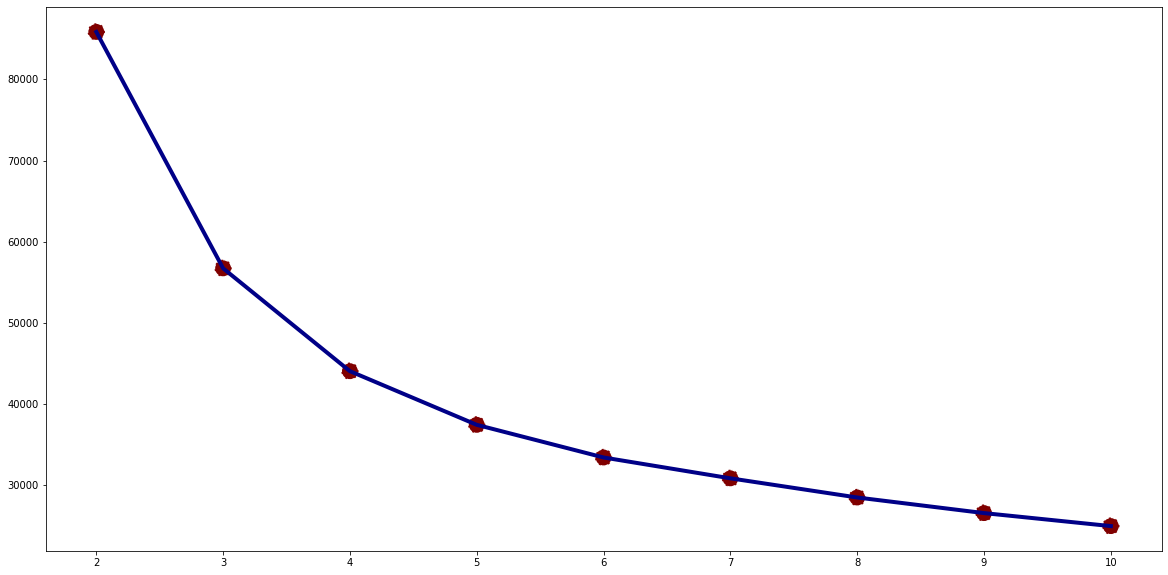

In [169]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data.values)
    inertia.append(kmeans.inertia_)

print(inertia)

plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')

In [170]:
l = [i for i in range(2,11)]

In [171]:
l = pd.DataFrame(l)
l['inertia'] = inertia
l = l.set_index(0)

In [172]:
l['pct_change'] = l['inertia'].pct_change()
l

,inertia,pct_change
0,,
2,85858.891677,NaN
3,56733.298533,-0.339226
4,44063.759475,-0.223318
5,37455.847333,-0.149963
6,33432.677822,-0.107411
7,30865.017873,-0.076801
8,28503.636045,-0.076507
9,26581.237843,-0.067444
10,24980.588180,-0.060217


In [141]:
# from sklearn.metrics import silhouette_score

In [ ]:
# silhoutte = []

# for i in range(2, 11):
#     kmeans = KMeans(n_clusters=i, random_state=0)
#     preds = kmeans.fit_predict(data.values)
#     centers = kmeans.cluster_centers_

#     score = silhouette_score(data.values, preds)
#     silhoutte.append(score)
#     print("For n_clusters = {}, silhouette score is {})".format(i, score))

In [ ]:
# sns.lineplot(x=range(2, 11), y=silhoutte, color='#000087', linewidth = 4)
# sns.scatterplot(x=range(2, 11), y=silhoutte, s=300, color='#800000',  linestyle='--')

In [173]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(data.values)

KMeans(n_clusters=4, random_state=0)

In [174]:
# data['target'] = y
data['cluster'] = kmeans.labels_

In [175]:
data.head()

,flight_count,sum_yr_1,seg_km_sum,cluster
0,14.028313,28.800251,26.761413,3
1,9.070326,20.428199,13.128107,3
2,8.716184,19.460968,12.654758,3
3,0.783406,13.647990,12.541907,3
4,9.920267,14.657648,13.899923,3


In [179]:
result = data.copy()

In [180]:
result[feat] = scaler.inverse_transform(result[feat])

In [181]:
result.groupby('cluster').agg({
    'flight_count':'mean',
    'sum_yr_1':'mean',
    'seg_km_sum':'mean'
})

,flight_count,sum_yr_1,seg_km_sum
cluster,,,
0,5.294846,2083.147623,7513.872303
1,41.127750,19422.920745,58553.486529
2,18.390542,8061.710045,26684.673400
3,75.558860,48185.553903,120837.013631


In [182]:
result[result['cluster']==0].describe()

,flight_count,sum_yr_1,seg_km_sum,cluster
count,41520.000000,41520.000000,41520.000000,41520.0
mean,5.294846,2083.147623,7513.872303,0.0
std,3.209589,1967.430121,4853.314986,0.0
min,2.000000,0.000000,368.000000,0.0
25%,3.000000,517.500000,3762.000000,0.0
50%,4.000000,1648.000000,6318.500000,0.0
75%,7.000000,3157.250000,10373.000000,0.0
max,23.000000,16726.000000,37991.000000,0.0


In [183]:
result[result['cluster']==1].describe()

,flight_count,sum_yr_1,seg_km_sum,cluster
count,4454.000000,4454.000000,4454.000000,4454.0
mean,41.127750,19422.920745,58553.486529,1.0
std,14.245437,8045.589087,18632.011630,0.0
min,4.000000,0.000000,8648.000000,1.0
25%,32.000000,14070.750000,45446.000000,1.0
50%,40.000000,18563.500000,55244.000000,1.0
75%,49.000000,23736.000000,68149.750000,1.0
max,103.000000,66634.000000,184730.000000,1.0


In [184]:
result[result['cluster']==2].describe()

,flight_count,sum_yr_1,seg_km_sum,cluster
count,14654.000000,14654.000000,14654.00000,14654.0
mean,18.390542,8061.710045,26684.67340,2.0
std,6.891422,4377.386436,9834.74925,0.0
min,2.000000,0.000000,4048.00000,2.0
25%,14.000000,5090.000000,19507.50000,2.0
50%,17.000000,7690.000000,24847.00000,2.0
75%,23.000000,10523.750000,32012.00000,2.0
max,59.000000,38555.000000,86723.00000,2.0


In [186]:
result[result['cluster']==3].describe()

,flight_count,sum_yr_1,seg_km_sum,cluster
count,807.000000,807.000000,807.000000,807.0
mean,75.558860,48185.553903,120837.013631,3.0
std,29.785314,22791.861181,47178.470219,0.0
min,6.000000,3126.000000,35829.000000,3.0
25%,58.000000,33782.000000,93091.000000,3.0
50%,75.000000,42580.000000,111809.000000,3.0
75%,93.000000,56088.500000,135738.000000,3.0
max,213.000000,239560.000000,580717.000000,3.0


<AxesSubplot:xlabel='sum_yr_1', ylabel='seg_km_sum'>

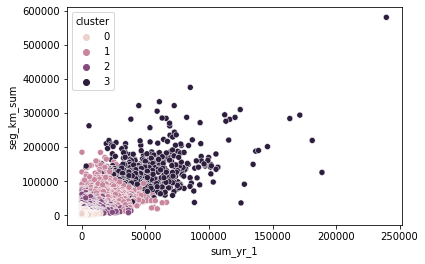

In [189]:
sns.scatterplot(data=result, x='sum_yr_1', y='seg_km_sum', 
                hue='cluster')

<AxesSubplot:xlabel='flight_count', ylabel='seg_km_sum'>

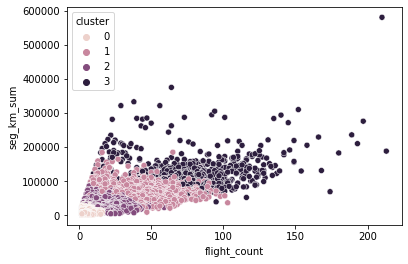

In [190]:
sns.scatterplot(data=result, x='flight_count', y='seg_km_sum', 
                hue='cluster')

<AxesSubplot:xlabel='flight_count', ylabel='sum_yr_1'>

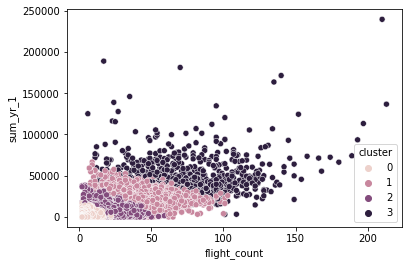

In [191]:
sns.scatterplot(data=result, x='flight_count', y='sum_yr_1', 
                hue='cluster')

Insight:
- cluster 0 : customer yang flight_count, sum_yr_1, dan seg_km_sum cenderung mendekati 0. Kemungkinan besar ini adalah customer yang baru join (new-joiners), sehingga belum banyak menggunakan service.
- cluster 1 : segmentasi customer yang mulai sudah mulai menjadi loyal, karena flight count lebih dari cluster 0 (new-joiners). Jarak penerbangan dan jumlah farenya pun juga sudah mulai bertambah.
- cluster 2 : segmentasi customer yang sudah makin loyal, lebih dari cluster 1. Kemungkinan besar segmentasi ini sudah lebih familiar dengan service kita. Flight count, sum_yr_1, dan seg_km_sum sudah lebih dari normal.
- cluster 3 : segmentasi customer yang paling loyal. Segmentasi ini sudah dipastikan memiliki antara flight count yang sangat tinggi, sum_yr_1 yang sangat tinggi, atau seg_km_sum sangat tinggi.

# Rekomendasi Bisnis

Membuat class untuk memisahkan customer pada loyalty program. 

## Strategi 1

Membuat loyalty program. Semakin tinggi flight count, semakin banyak sum_yr_1, dan/atau semakin jauh seg_km_sum, maka semakin bertambah juga poin dari customer. Pada loyalty program, dibuatlah 4 level customer, seperti bronze, silver, gold, dan platinum. Tentunya, semakin tinggi level customer, maka semakin banyak keuntungan yang dapat ditukarkan dengan poin yang sudah didapatkan oleh customer melalui flightnya. Keuntungannya bisa berupa discount coupon yang dapat diredeem ataupun untuk customer yang platinum sebuah tiket gratis dengan ketentuan dan syarat tertentu.

## Strategi 2

Segmentasi yang sudah dibuatkan dapat menjadi acuan untuk tim marketing agar dapat membuat strategi yang tepat sasaran. Beberapa ide marketing sebagai berikut:
- Untuk cluster 0, karena mereka umumnya adalah pengguna baru, dapat kita blasting sejumlah discount coupons agar mereka tertarik untuk melakukan first flights mereka menggunakan jasa kita.
- Untuk cluster 1, karena mereka baru mulai sering menggunakan jasa kita, oleh karena itu dapat kita pertahankan loyalty mereka dengan cara meningkatkan service untuk mereka pada saat flight berupa small rewards (seperti merchandise or snacks on flight).
- Untuk cluster 2, karena mereka sudah loyal dan sudah kemungkinan besar menggunakan penerbangan dengan kita, dapat kita cross-selling ke hotel dengan memberikan akses untuk mendapatkan discount coupons untuk hotel. 
- Untuk cluster 3, karena mereka adalah customer terloyal, dapat kita prioritaskan untuk jasa kita. Contohnya, mereka dapat prioritas untuk merubah seating, atau dikirimkan merchandise ke rumah (seperti t-shirt dengan logo company atau tas).

In [196]:
df.head()

,member_no,ffp_date,first_flight_date,gender,ffp_tier,age,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
0,54993,2006-11-02,2008-12-24,Male,6,31.0,210,505308,239560.0,234188.0,580717,2014-03-31,1,3.483254,18,34,0.961639,619760,50
1,28065,2007-02-19,2007-08-03,Male,6,42.0,140,362480,171483.0,167434.0,293678,2014-03-25,7,5.194245,17,29,1.252314,415768,33
2,55106,2007-02-01,2007-08-30,Male,6,40.0,135,351159,163618.0,164982.0,283712,2014-03-21,11,5.298507,18,20,1.254676,406361,26
3,21189,2008-08-22,2008-08-23,Male,5,64.0,23,337314,116350.0,125500.0,281336,2013-12-26,97,27.863636,73,11,1.090870,372204,12
4,39546,2009-04-10,2009-04-15,Male,6,48.0,152,273844,124560.0,130702.0,309928,2014-03-27,5,4.788079,47,27,0.970658,338813,39
